In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go

In [6]:
path = os.getcwd()

In [8]:
users = pd.read_excel(path+'/user_purchase_data.xlsx', sheet_name='user_registration')

In [9]:
users.head(3)

,userID,is_subscriber
0,1,No
1,2,No
2,3,No


In [10]:
users.shape

(201217, 2)

In [11]:
users.isna().sum()

userID           0
is_subscriber    0
dtype: int64

In [16]:
users[users['userID'].duplicated()].shape[0]

0

In [20]:
round(100*users['is_subscriber'].value_counts(dropna=False, normalize = True),2)

No     99.21
Yes     0.79
Name: is_subscriber, dtype: float64

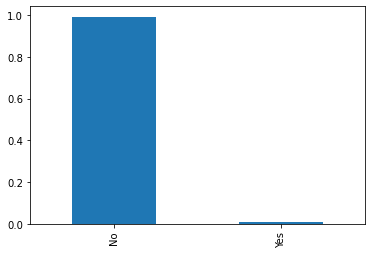

In [21]:
users['is_subscriber'].value_counts(dropna=False, normalize = True).plot(kind = 'bar') 

### Mobile orders table

In [22]:
mobile = pd.read_excel(path+'/user_purchase_data.xlsx', sheet_name='mobile_orders')
mobile.sample(4)

,user_id,mobile_orders
43368,61804,3
79276,112747,2
64331,91620,7
119489,169861,1


In [23]:
mobile.shape

(141690, 2)

In [24]:
mobile.isna().sum()

user_id          0
mobile_orders    0
dtype: int64

In [27]:
mobile[mobile['user_id'].duplicated()].shape[0]

0

In [28]:
mobile['mobile_orders'].describe()

count    141690.000000
mean          9.565947
std          24.138480
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max        1174.000000
Name: mobile_orders, dtype: float64

In [30]:
mobile.dtypes

user_id          int64
mobile_orders    int64
dtype: object

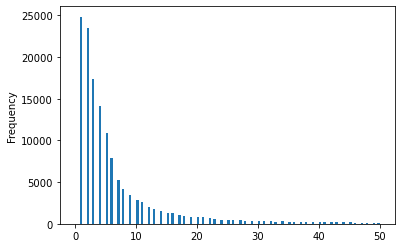

In [32]:
mobile['mobile_orders'].plot(kind = 'hist', bins =130, range=[0,50])

In [35]:
## users not made the purchase or delete their account before
mobile[~mobile['user_id'].isin(users['userID'])].shape[0]

1827

In [38]:
mobile.loc[~mobile['user_id'].isin(users['userID']), 'user_id'].tolist()

[201218,
 201219,
 201220,
 201221,
 201222,
 201223,
 201224,
 201225,
 201226,
 201227,
 201228,
 201229,
 201230,
 201231,
 201232,
 201233,
 201234,
 201235,
 201236,
 201237,
 201238,
 201239,
 201240,
 201241,
 201242,
 201243,
 201244,
 201245,
 201246,
 201247,
 201248,
 201249,
 201250,
 201251,
 201252,
 201253,
 201254,
 201255,
 201256,
 201257,
 201258,
 201259,
 201260,
 201261,
 201262,
 201263,
 201264,
 201265,
 201266,
 201267,
 201268,
 201269,
 201270,
 201271,
 201272,
 201273,
 201274,
 201275,
 201276,
 201277,
 201278,
 201279,
 201280,
 201281,
 201282,
 201283,
 201284,
 201285,
 201286,
 201287,
 201288,
 201289,
 201290,
 201291,
 201292,
 201293,
 201294,
 201295,
 201296,
 201297,
 201298,
 201299,
 201300,
 201301,
 201302,
 201303,
 201304,
 201305,
 201306,
 201307,
 201308,
 201309,
 201310,
 201311,
 201312,
 201313,
 201314,
 201315,
 201316,
 201317,
 201318,
 201319,
 201320,
 201321,
 201322,
 201323,
 201324,
 201325,
 201326,
 201327,
 201328,
 

### In store order table

In [39]:
in_store = pd.read_excel(path+'/user_purchase_data.xlsx', sheet_name='in_store_orders')
in_store.head(3)

,user_id,in_store_orders
0,5,26
1,6,1
2,26,5


In [40]:
in_store.shape

(53287, 2)

In [41]:
in_store.isna().sum()

user_id            0
in_store_orders    0
dtype: int64

In [43]:
in_store['user_id'].nunique() == in_store.shape[0]

True

In [44]:
in_store['in_store_orders'].describe()

count    53287.000000
mean        23.849701
std         55.010021
min          1.000000
25%          3.000000
50%          9.000000
75%         24.000000
max       1419.000000
Name: in_store_orders, dtype: float64

In [47]:
in_store.dtypes

user_id            int64
in_store_orders    int64
dtype: object

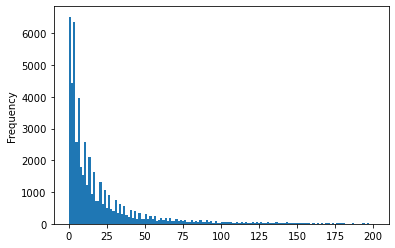

In [52]:
in_store['in_store_orders'].plot(kind='hist', bins =140, range = [0,200])

In [53]:
in_store.loc[~mobile['user_id'].isin(users['userID']), 'user_id'].tolist()

[367,
 201222,
 582,
 1029,
 1199,
 1236,
 1264,
 1351,
 1563,
 1638,
 1726,
 2014,
 2305,
 2468,
 2506,
 2614,
 2793,
 3004,
 3183,
 3231,
 3748,
 3968,
 4268,
 4904,
 5217,
 5670,
 6025,
 6665,
 7110,
 8291,
 8629,
 8741,
 8910,
 9004,
 9291,
 9660,
 10305,
 11404,
 11915,
 12852,
 13127,
 13355,
 14204,
 14478,
 14605,
 14681,
 15833,
 16167,
 16194,
 16254,
 16603,
 17581,
 17759,
 17904,
 19106,
 19150,
 19380,
 19844,
 19879,
 19884,
 20453,
 203166,
 20812,
 21321,
 21398,
 21407,
 21420,
 21845,
 21876,
 22154,
 22289,
 22839,
 23963,
 24845,
 25155,
 25231,
 25675,
 26406,
 26672,
 203203,
 26963,
 27119,
 27211,
 27277,
 27542,
 27877,
 28248,
 28791,
 28960,
 29409,
 29590,
 30527,
 30965,
 31164,
 31225,
 31344,
 31523,
 31605,
 31842,
 32253,
 32621,
 32847,
 32889,
 33116,
 33574,
 33598,
 33646,
 33904,
 34162,
 203240,
 34379,
 34760,
 35279,
 35509,
 35583,
 35893,
 36408,
 36409,
 36465,
 36653,
 37093,
 37464,
 37553,
 37724,
 37878,
 38202,
 38445,
 38644,
 38708,
 

## DataFrame manipulation

In [54]:
users.rename(columns = {'userID':'user_id'}, inplace = True)

In [55]:
users.head(3)

,user_id,is_subscriber
0,1,No
1,2,No
2,3,No


In [59]:
users['user_category'] = ['Premium' if i=='Yes' else 'Free' for i in users['is_subscriber']]
users.drop(columns = 'is_subscriber', inplace = True)

In [60]:
users.tail(3)

,user_id,user_category
201214,201215,Free
201215,201216,Free
201216,201217,Free


In [62]:
users['user_category'].value_counts()

Free       199633
Premium      1584
Name: user_category, dtype: int64

In [86]:
orders = pd.merge(users, mobile, how='left', on='user_id').merge(in_store, how='left', on='user_id')
orders.head(5)

,user_id,user_category,mobile_orders,in_store_orders
0,1,Free,NaN,NaN
1,2,Free,5.0,NaN
2,3,Free,NaN,NaN
3,4,Free,2.0,NaN
4,5,Free,5.0,26.0


In [87]:
orders.isna().sum()

user_id                 0
user_category           0
mobile_orders       61354
in_store_orders    149484
dtype: int64

In [88]:
for col in orders.columns[2:]:
    orders[col] = orders[col].fillna(0)
orders.head()

,user_id,user_category,mobile_orders,in_store_orders
0,1,Free,0.0,0.0
1,2,Free,5.0,0.0
2,3,Free,0.0,0.0
3,4,Free,2.0,0.0
4,5,Free,5.0,26.0


In [71]:
orders.dtypes

user_id              int64
user_category       object
mobile_orders      float64
in_store_orders    float64
dtype: object

In [89]:
orders['total_orders'] = orders['mobile_orders'] + orders['in_store_orders']
orders['total_orders'] = orders['total_orders'].astype(int)
orders.head(5)

,user_id,user_category,mobile_orders,in_store_orders,total_orders
0,1,Free,0.0,0.0,0
1,2,Free,5.0,0.0,5
2,3,Free,0.0,0.0,0
3,4,Free,2.0,0.0,2
4,5,Free,5.0,26.0,31


In [90]:
orders.drop(columns = ['mobile_orders','in_store_orders'], inplace= True)

In [91]:
orders.head(5)

,user_id,user_category,total_orders
0,1,Free,0
1,2,Free,5
2,3,Free,0
3,4,Free,2
4,5,Free,31


In [94]:
orders['total_orders'].describe()

count    201217.000000
mean         12.952131
std          46.347289
min           0.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        2279.000000
Name: total_orders, dtype: float64

In [96]:
orders[(orders['user_category']=='Free') & (orders['total_orders']>=1)].shape[0]

150055

In [108]:
## we can play around to check the difference between free and premium users 
cat = 'Free'
min_orders = 1

100* orders[(orders['user_category']== cat) & (orders['total_orders']>= min_orders)].shape[0]/\
(orders['user_category']== cat).sum()

75.16542856141018

In [116]:
order_bins = [0,1,2,3,4,5,6,7,8,10,12,15,20,25,30,35,40,45,50,55,60,70,80,90,100,120,
             140,160,180,200,250,300,350,400,450,500,550,600,700,800,900,1000,1100]

In [117]:
len(order_bins)

43

In [118]:
for order_bin in order_bins:
    orders['orders>='+str(order_bin)] =[1 if i>=order_bin else 0 for i in orders['total_orders']]
orders.head(5)

,user_id,user_category,total_orders,orders>=0,orders>=1,orders>=2,orders>=3,orders>=4,orders>=5,orders>=6,...,orders>=400,orders>=450,orders>=500,orders>=550,orders>=600,orders>=700,orders>=800,orders>=900,orders>=1000,orders>=1100
0,1,Free,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Free,5,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Free,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Free,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Free,31,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [119]:
pd.set_option('display.max_columns',None)
orders.head(5)

,user_id,user_category,total_orders,orders>=0,orders>=1,orders>=2,orders>=3,orders>=4,orders>=5,orders>=6,orders>=7,orders>=8,orders>=10,orders>=12,orders>=15,orders>=20,orders>=25,orders>=30,orders>=35,orders>=40,orders>=45,orders>=50,orders>=55,orders>=60,orders>=70,orders>=80,orders>=90,orders>=100,orders>=120,orders>=140,orders>=160,orders>=180,orders>=200,orders>=250,orders>=300,orders>=350,orders>=400,orders>=450,orders>=500,orders>=550,orders>=600,orders>=700,orders>=800,orders>=900,orders>=1000,orders>=1100
0,1,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Free,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Free,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Free,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
totals = orders.drop(columns = ['user_id','total_orders'])
totals.head()

,user_category,orders>=0,orders>=1,orders>=2,orders>=3,orders>=4,orders>=5,orders>=6,orders>=7,orders>=8,orders>=10,orders>=12,orders>=15,orders>=20,orders>=25,orders>=30,orders>=35,orders>=40,orders>=45,orders>=50,orders>=55,orders>=60,orders>=70,orders>=80,orders>=90,orders>=100,orders>=120,orders>=140,orders>=160,orders>=180,orders>=200,orders>=250,orders>=300,orders>=350,orders>=400,orders>=450,orders>=500,orders>=550,orders>=600,orders>=700,orders>=800,orders>=900,orders>=1000,orders>=1100
0,Free,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Free,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Free,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Free,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Free,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
totals.columns[1:]

Index(['orders>=0', 'orders>=1', 'orders>=2', 'orders>=3', 'orders>=4',
       'orders>=5', 'orders>=6', 'orders>=7', 'orders>=8', 'orders>=10',
       'orders>=12', 'orders>=15', 'orders>=20', 'orders>=25', 'orders>=30',
       'orders>=35', 'orders>=40', 'orders>=45', 'orders>=50', 'orders>=55',
       'orders>=60', 'orders>=70', 'orders>=80', 'orders>=90', 'orders>=100',
       'orders>=120', 'orders>=140', 'orders>=160', 'orders>=180',
       'orders>=200', 'orders>=250', 'orders>=300', 'orders>=350',
       'orders>=400', 'orders>=450', 'orders>=500', 'orders>=550',
       'orders>=600', 'orders>=700', 'orders>=800', 'orders>=900',
       'orders>=1000', 'orders>=1100'],
      dtype='object')

In [127]:
totals.groupby('user_category')[totals.columns[1:]].sum().reset_index()

,user_category,orders>=0,orders>=1,orders>=2,orders>=3,orders>=4,orders>=5,orders>=6,orders>=7,orders>=8,orders>=10,orders>=12,orders>=15,orders>=20,orders>=25,orders>=30,orders>=35,orders>=40,orders>=45,orders>=50,orders>=55,orders>=60,orders>=70,orders>=80,orders>=90,orders>=100,orders>=120,orders>=140,orders>=160,orders>=180,orders>=200,orders>=250,orders>=300,orders>=350,orders>=400,orders>=450,orders>=500,orders>=550,orders>=600,orders>=700,orders>=800,orders>=900,orders>=1000,orders>=1100
0,Free,199633,150055,127507,105052,88675,76665,66874,59841,54505,46510,40463,34116,26777,21938,18467,15787,13669,11960,10551,9377,8452,6985,5922,5125,4442,3432,2761,2226,1805,1497,952,668,501,377,296,242,205,165,118,86,73,60,50
1,Premium,1584,1271,1162,1089,1032,972,915,863,804,741,692,635,548,489,455,410,380,362,330,317,307,277,257,227,201,171,153,137,113,105,90,73,58,51,45,43,41,37,29,24,19,12,7


In [128]:
totals = totals.groupby('user_category')[totals.columns[1:]].sum().reset_index()

In [131]:
graph_df = pd.melt(totals, id_vars = 'user_category', value_vars = totals.columns[1:], 
        var_name='order_bin', value_name = 'registered_users' )

In [132]:
graph_df

,user_category,order_bin,registered_users
0,Free,orders>=0,199633
1,Premium,orders>=0,1584
2,Free,orders>=1,150055
3,Premium,orders>=1,1271
4,Free,orders>=2,127507
...,...,...,...
81,Premium,orders>=900,19
82,Free,orders>=1000,60
83,Premium,orders>=1000,12
84,Free,orders>=1100,50


In [137]:
graph_df['min_orders'] = [int(i.split('>=')[1]) for i in graph_df['order_bin']]
graph_df.drop(columns = 'order_bin', inplace = True)
graph_df

,user_category,registered_users,min_orders
0,Free,199633,0
1,Premium,1584,0
2,Free,150055,1
3,Premium,1271,1
4,Free,127507,2
...,...,...,...
81,Premium,19,900
82,Free,60,1000
83,Premium,12,1000
84,Free,50,1100


In [157]:
baseline = 0
graph_df['category_totals'] =\
[graph_df.loc[(graph_df['user_category'] == i)&
             (graph_df['min_orders']== baseline),'registered_users'].max() for i in graph_df['user_category']]

In [158]:
graph_df

,user_category,registered_users,min_orders,category_totals
0,Free,199633,0,199633
1,Premium,1584,0,1584
2,Free,150055,1,199633
3,Premium,1271,1,1584
4,Free,127507,2,199633
...,...,...,...,...
81,Premium,19,900,1584
82,Free,60,1000,199633
83,Premium,12,1000,1584
84,Free,50,1100,199633


In [160]:
graph_df['%_registered_users'] = graph_df['registered_users']/graph_df['category_totals']

In [161]:
graph_df

,user_category,registered_users,min_orders,category_totals,%_registered_users
0,Free,199633,0,199633,1.000000
1,Premium,1584,0,1584,1.000000
2,Free,150055,1,199633,0.751654
3,Premium,1271,1,1584,0.802399
4,Free,127507,2,199633,0.638707
...,...,...,...,...,...
81,Premium,19,900,1584,0.011995
82,Free,60,1000,199633,0.000301
83,Premium,12,1000,1584,0.007576
84,Free,50,1100,199633,0.000250


In [162]:
graph_df = graph_df.drop(columns=['registered_users','category_totals'])
graph_df

,user_category,min_orders,%_registered_users
0,Free,0,1.000000
1,Premium,0,1.000000
2,Free,1,0.751654
3,Premium,1,0.802399
4,Free,2,0.638707
...,...,...,...
81,Premium,900,0.011995
82,Free,1000,0.000301
83,Premium,1000,0.007576
84,Free,1100,0.000250


## visualize data


In [178]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=graph_df.loc[graph_df['user_category']== 'Free','min_orders'],
                        y = graph_df.loc[graph_df['user_category']=='Free','%_registered_users'],
                        name = 'Free Customers'))

fig.add_trace(go.Scatter(x=graph_df.loc[graph_df['user_category']== 'Premium','min_orders'],
                        y = graph_df.loc[graph_df['user_category']=='Premium','%_registered_users'],
                        name = 'Free Customers'))

fig.show()

In [184]:
## use for loop

fig = go.Figure()

for i in graph_df['user_category'].unique():
    fig.add_trace(go.Scatter(x=graph_df.loc[graph_df['user_category']== i,'min_orders'],
                        y = graph_df.loc[graph_df['user_category']== i,'%_registered_users'],
                        name = i+'Users'))

fig.update_traces(mode = 'markers+lines')
fig.update_layout(hovermode = 'x unified', xaxis_title = 'Minimum Total Orders',
                  yaxis_title = '% of registered users who ordered '+ str(baseline)+'times')

fig.show()